In [1]:
#Airline crash data processing and visualization code
#====================================================
#
#Change History:
#
#====================================================

# Dependencies
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Function to put data values in bar chart
def autolabel(rects, ax):
   # Get y-axis height to calculate label position from.
   (y_bottom, y_top) = ax.get_ylim()
   y_height = y_top - y_bottom

   for rect in rects:
       height = rect.get_height()
       label_position = 1   #height + (y_height * 0.01)

       ax.text(rect.get_x() + rect.get_width()/2., label_position,
               '%d' % int(height),
               ha='center', va='bottom')

In [3]:
#Reading the cleaned up file

cleaned_file = "data/plane_crash_cleaned.csv"

oper_data = pd.read_csv(cleaned_file)
oper_data.head()

,Decade,Year,Date,Location,Operator,Op_Code,Route,Type,Make_Type,Aboard,Fatalities,Accident_Code,Summary
0,1900-1910,1908,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Military,Demonstration,Wright Flyer III,Wright,2.0,1.0,Human Error,"During a demonstration flight, a U.S. Army fly..."
1,1911-1920,1912,1912-12-07,"AtlantiCity, New Jersey",Military - U.S. Navy,Military,Test flight,Dirigible,Dirigibl,5.0,5.0,War,First U.S. dirigible Akron exploded just offsh...
2,1911-1920,1913,1913-06-08,"Victoria, British Columbia, Canada",Private,Passenger,NaN,Curtiss seaplane,Curtiss,1.0,1.0,Weather,The first fatal airplane accident in Canada oc...
3,1911-1920,1913,1913-09-09,Over the North Sea,Military - German Navy,Military,NaN,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,Landing/Takeoff,The airship flew into a thunderstorm and encou...
4,1911-1920,1913,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Military,NaN,Zeppelin L-2 (airship),Zeppelin,30.0,30.0,War,Hydrogen gas which was being vented was sucked...


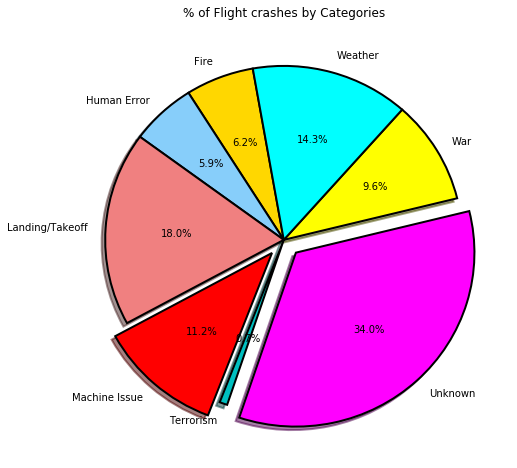

In [4]:
#Create pie chart Accident type%

ac_data = oper_data.groupby("Accident_Code")
actotal = ac_data.Accident_Code.count().sum()
ac_prct = (ac_data.Accident_Code.count()/actotal)*100

# Build Pie Chart
plt.figure(figsize=(10,15))
plt.pie(
    ac_prct,labels =ac_prct.index, 
    colors=["Gold", "lightskyblue","lightcoral","red","c","magenta","yellow","cyan"],
    labeldistance=1.1,
    pctdistance= 0.6,
    autopct="%1.1f%%",
    startangle=100,
    shadow = True,
    wedgeprops   = { 'linewidth' : 2,
                     'edgecolor' : "black" },
    explode = (0, 0, 0, 0.1, 0, 0.1, 0, 0))

plt.title("% of Flight crashes by Categories")


#size of plot to make circle big/small
fig = plt.gcf()
fig.set_size_inches(8,8) #size of plot

#save pie chart
plt.savefig("output/PieChart_Prcnt_of_crash_by_categories.png")
plt.show()

In [5]:
#Analyzing data by flight category
#Grouping the data by "Op Code" and then showcase in pie chart

oper_data_grp = oper_data.groupby("Op_Code")

oper_data1 = oper_data_grp["Year"].count()
oper_data1.head()

df_machine = oper_data1.to_frame()
#df_machine.columns = ['Total_Year']

#df_machine['Total_Year'] = df_machine.index
df_machine.head()

,Year
Op_Code,
Military,781
Others,91
Passenger,4396


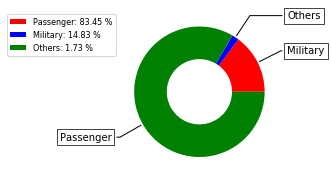

<Figure size 432x288 with 0 Axes>

In [6]:
#Visualization of data by flight category

values_x=df_machine["Year"]
sum1 = df_machine["Year"].sum()
labels_y=df_machine.index

percentage = ["Passenger: {0:.2f} %".format((df_machine.iloc[2,0]/sum1)*100),"Military: {0:.2f} %".format((df_machine.iloc[0,0]/sum1)*100),"Others: {0:.2f} %".format((df_machine.iloc[1,0]/sum1)*100)]
colors=["Red","Blue","Green"]

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(values_x, colors=colors, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels_y[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(wedges, percentage, labels_y),
                                         key=lambda x: values_x[2],
                                         reverse=True))

plt.legend(patches, labels,loc='best', bbox_to_anchor=(.01, 1.), fontsize=8)    
    
#plt.title("Crashes by Flight Category")
plt.show()
plt.savefig("output/category_doughnut.png")

In [7]:
#Data visualization by year

df_crash_per_yr = oper_data.groupby("Year")

df = df_crash_per_yr["Year"].count()

df_crashyr = df.to_frame()
df_crashyr.columns = ['Total']
df_crashyr['Year'] = df_crashyr.index
df_crashyr.head()


,Total,Year
Year,,
1908,1,1908
1912,1,1912
1913,3,1913
1915,2,1915
1916,5,1916


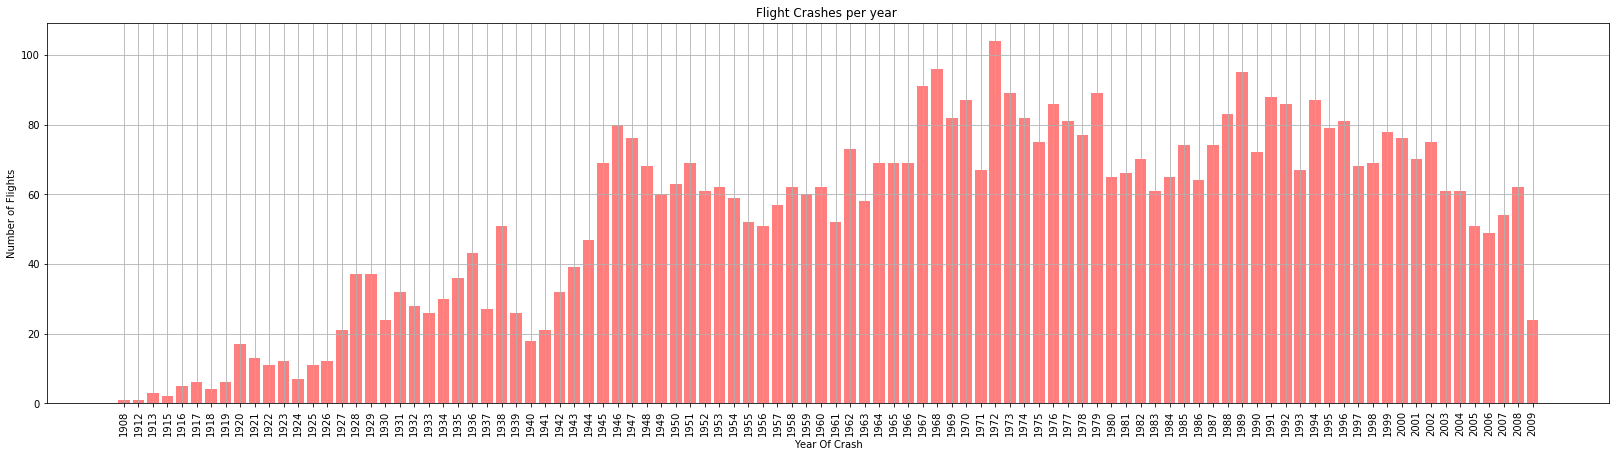

In [8]:
#Visualization of data by year

#Set x axis and tick locations
x_axis = np.arange(len(df_crashyr))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(28,7))

plt.bar(x_axis,df_crashyr["Total"], color='r', alpha=0.5, align="edge")

plt.xticks(tick_locations, df_crashyr["Year"], rotation="vertical")

plt.grid()
plt.title("Flight Crashes per year ")
plt.xlabel('Year Of Crash', fontsize = 10)
plt.ylabel('Number of Flights')
plt.savefig('output/Bar_allFlights.png')
plt.show()

In [9]:
#Data Analysis by Operators

df_crash_by_type = oper_data.groupby("Operator")

df_operator = df_crash_by_type["Operator"].count()
df_operator.head()

crash_operator = df_operator.to_frame()
crash_operator.columns = ['Total']
crash_operator['Operator'] = crash_operator.index

#sort by high values on top and get top 20 , as too many records
oper_tot_sort = crash_operator.sort_values("Total", ascending=False).head(20)
oper_tot_sort.head()

,Total,Operator
Operator,,
Aeroflot,179,Aeroflot
Military - U.S. Air Force,176,Military - U.S. Air Force
Air France,70,Air France
Deutsche Lufthansa,65,Deutsche Lufthansa
United Air Lines,44,United Air Lines


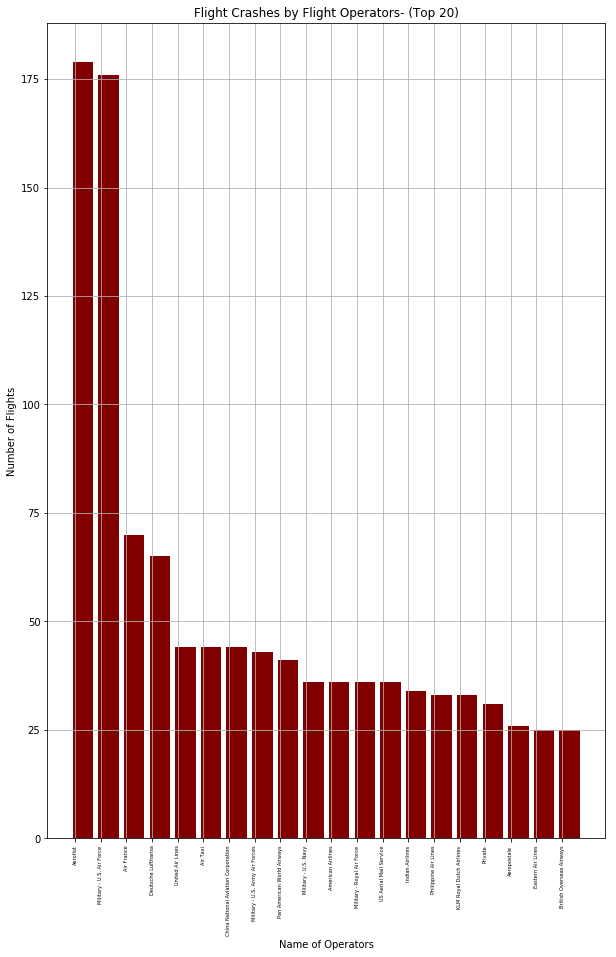

In [10]:
#Visualization of which type of plane crashed most
#Set x axis and tick locations

xlength = len(oper_tot_sort)
x_axis = np.arange(len(oper_tot_sort))

tick_locations = [value+0.1 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,15))

plt.bar(x_axis,oper_tot_sort["Total"], color='maroon',align="edge")

plt.xticks(tick_locations, oper_tot_sort["Operator"], rotation="vertical", fontsize=5)

plt.grid()
plt.title("Flight Crashes by Flight Operators- " + "("+ "Top "+ str(xlength) + ")")
plt.xlabel('Name of Operators', fontsize = 10)
plt.ylabel('Number of Flights')
plt.savefig('output/Bar_allFlights_Operator.png')
plt.show()

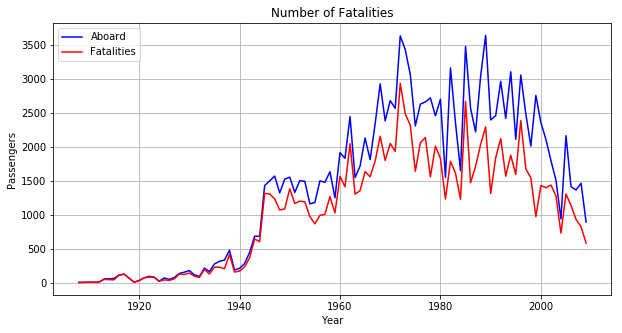

In [11]:
#Data Analysis and visualization for cumulative Aboard and Fatalities vs. Year

var_yr=oper_data.groupby("Year", as_index=False)["Aboard","Fatalities"].sum()

plt.figure(figsize=(10,5))

plt.plot(var_yr["Year"],var_yr["Aboard"], color = 'blue')
plt.plot(var_yr["Year"],var_yr["Fatalities"], color = 'red')

plt.grid()
plt.title("Number of Fatalities")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend(loc="upper left")
plt.savefig("output/aboardvsfatalities_by_yr")
plt.show()

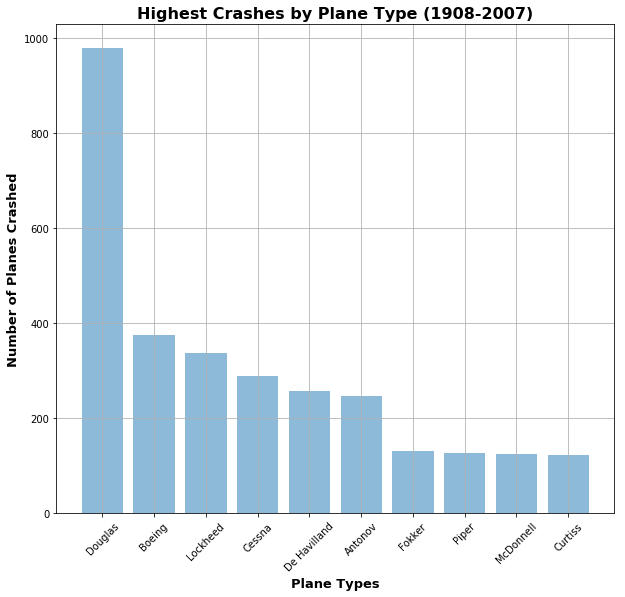

In [12]:
#Plot Graph for Highest Crashes by Plane Type (1908-2007)

type_pd = oper_data.groupby("Make_Type").count().reset_index()
type_pd["Make_Type"] = type_pd["Make_Type"].replace(regex='de', value='De Havilland')
type_pd = type_pd.sort_values('Type',ascending=False)

x_axis = np.arange(len(type_pd.head(10)))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,9))

#plt.bar(x_axis,df_crash_per_yr["Year"], color='r', alpha=0.5, align="edge")
plt.bar(x_axis,type_pd.Type.head(10), alpha=0.5, align="edge")
plt.xticks(tick_locations, type_pd.Make_Type.head(10), rotation=45)
plt.grid()
plt.title("Highest Crashes by Plane Type (1908-2007)",fontdict ={'fontweight':'bold','fontsize':16})
plt.xlabel('Plane Types', fontdict ={'fontweight':'bold','fontsize':13})
plt.ylabel('Number of Planes Crashed',fontdict ={'fontweight':'bold','fontsize':13})
plt.savefig('output/Bar_EngineTypes.png')
plt.show()

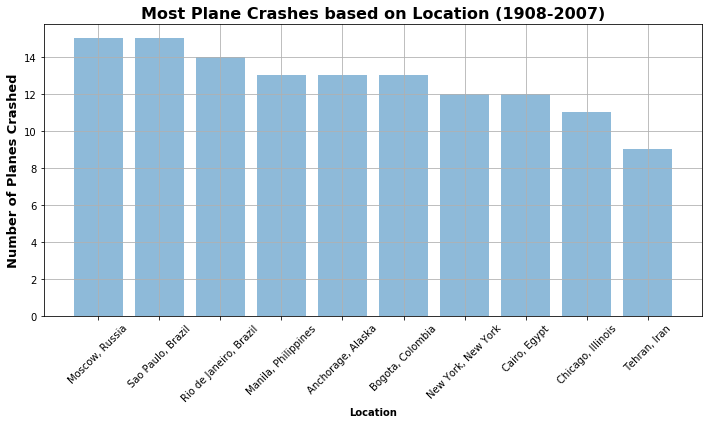

In [13]:
#Data Visulatization by crash location (1908-2007)

type_pd = oper_data.groupby("Location").count().reset_index()
type_pd = type_pd.sort_values('Date',ascending=False)

x_axis = np.arange(len(type_pd.head(10)))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,6))

plt.bar(x_axis,type_pd.Date.head(10), alpha=0.5, align="edge")
plt.xticks(tick_locations, type_pd.Location.head(10), rotation=45)
plt.grid()
plt.title("Most Plane Crashes based on Location (1908-2007)",fontdict ={'fontweight':'bold','fontsize':16})
plt.xlabel('Location', fontdict ={'fontweight':'bold','fontsize':10})
plt.ylabel('Number of Planes Crashed',fontdict ={'fontweight':'bold','fontsize':13})
plt.tight_layout()
plt.savefig('output/Location_type.png')
plt.show()

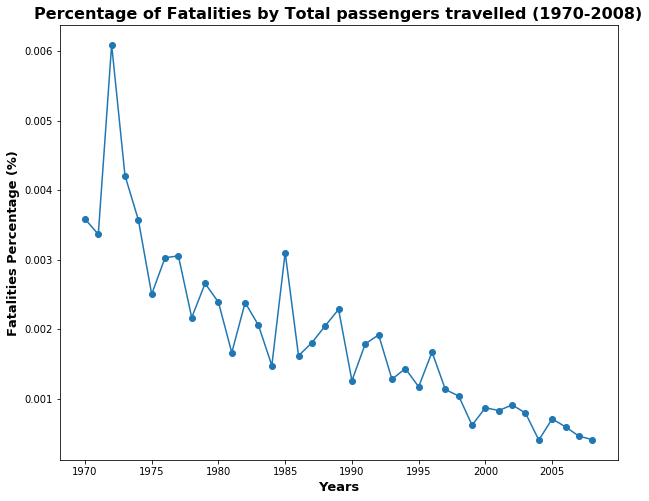

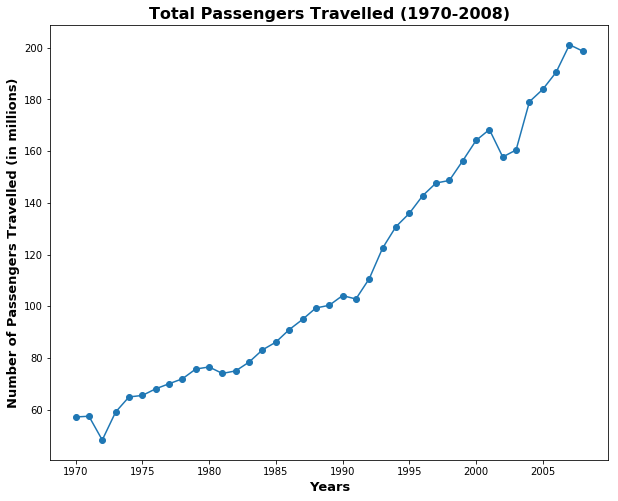

In [14]:
#Data visualization for passenger travelling (1970-2008)

years = oper_data.groupby("Year").sum()
years =years.drop(years.index[0:58])
years =years.drop(years.index[-1]).reset_index()

#Using second data file with total passenger travelled information
all_flights = pd.read_csv("data/All_flights.csv",encoding="ISO-8859-1")
all_flights = all_flights.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],axis=1)
all_flights = all_flights.replace(np.nan, 0)
all_flights = pd.DataFrame(all_flights.sum())
all_flights = all_flights.drop(all_flights.index[0:10])
all_flights = all_flights['1970':'2008']
all_flights.columns = ['Sum']
all_flights.index.name = 'Year'
all_flights = all_flights.reset_index()

#Initializing two new column with value as 0
years["Total_Passenger"] = 0
years["Percentage_dead"] = 0
for index,row in years.iterrows():
   for index1,row1 in all_flights.iterrows():
       if str(row["Year"].astype("int")) == row1["Year"]:

           years.loc[index,"Total_Passenger"] = row1["Sum"]/1000000
           years.loc[index,"Percentage_dead"] = (row['Fatalities']/row1["Sum"])*100

            
# Plot 1 to visualizing the Percentage of Fatalities by Total passengers travelled (1970-2008)          
plt.figure(figsize=(10,8))
plt.plot(years.Year,years.Percentage_dead,marker='o')
plt.title("Percentage of Fatalities by Total passengers travelled (1970-2008)",fontdict ={'fontweight':'bold','fontsize':16})
plt.xlabel('Years', fontdict ={'fontweight':'bold','fontsize':13})
plt.ylabel('Fatalities Percentage (%)',fontdict ={'fontweight':'bold','fontsize':13})
plt.savefig('output/Scatter_Percentage_of_Fatalities_from_total_travelled.png')

# Plot 2 to visualizing the Percentage of Fatalities by Total passengers travelled (1970-2008)
plt.figure(figsize=(10,8))
plt.plot(years.Year,years.Total_Passenger,marker='o')
plt.title("Total Passengers Travelled (1970-2008)",fontdict ={'fontweight':'bold','fontsize':16})
plt.xlabel('Years', fontdict ={'fontweight':'bold','fontsize':13})
plt.ylabel('Number of Passengers Travelled (in millions)',fontdict ={'fontweight':'bold','fontsize':13})
plt.savefig('output/total_travelled.png')

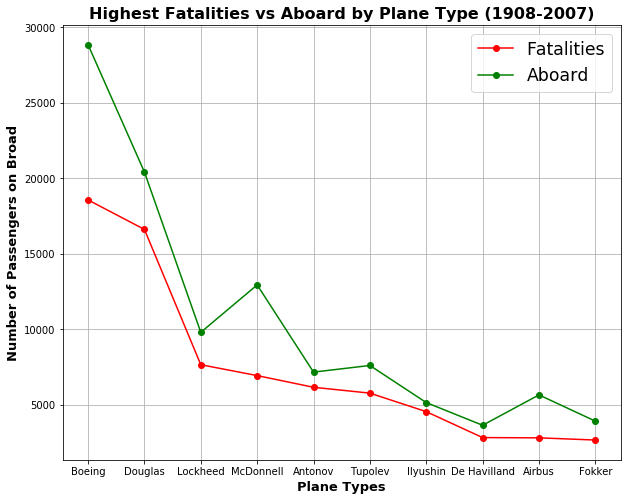

In [15]:
#Plot Graph for Highest Fatalities vs Aboard by Plane Type (1908-2007)

type_pd = oper_data.groupby("Make_Type").sum().reset_index()
type_pd["Make_Type"] = type_pd["Make_Type"].replace(regex='de', value='De Havilland')
type_pd = type_pd.sort_values('Fatalities',ascending=False)


plt.figure(figsize=(10,8))
plt.grid()
p1 = plt.plot(type_pd.Make_Type.head(10),type_pd.Fatalities.head(10),marker='o',label="Fatalities",color='r')
p2 = plt.plot(type_pd.Make_Type.head(10),type_pd.Aboard.head(10),marker='o',label="Aboard",color='g')
plt.legend(loc="best",fontsize = 'xx-large')
plt.title("Highest Fatalities vs Aboard by Plane Type (1908-2007)",fontdict ={'fontweight':'bold','fontsize':16})
plt.xlabel('Plane Types', fontdict ={'fontweight':'bold','fontsize':13})
plt.ylabel('Number of Passengers on Broad',fontdict ={'fontweight':'bold','fontsize':13})
plt.savefig('output/Scatter_Fatalities_Abroad_EngineTypes.png')

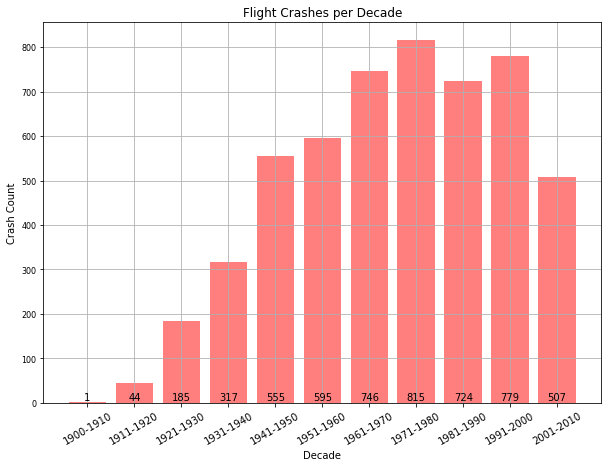

<Figure size 432x288 with 0 Axes>

In [16]:
#Visualization of crashes by decades

crash_df_decade = oper_data.groupby(["Decade"]).count().reset_index()
x_axis = np.arange(len(crash_df_decade))
tick_locations = [value+0.4 for value in x_axis]

fig, ax = plt.subplots(figsize=(10,7))

plt1 = ax.bar(x_axis,crash_df_decade["Date"], alpha=0.5, color = "r", align="edge")
plt.xticks(tick_locations, crash_df_decade["Decade"], rotation=30, fontweight ='normal')
plt.yticks(fontsize=8)
autolabel(plt1, ax)
plt.title("Flight Crashes per Decade")
plt.xlabel("Decade")
plt.ylabel("Crash Count")
plt.grid()
plt.show()
plt.savefig('output/Flight_Crashes_per_Decade.png')

In [17]:
# Visualization of which type of plane crashed most
#Set x axis and tick locations



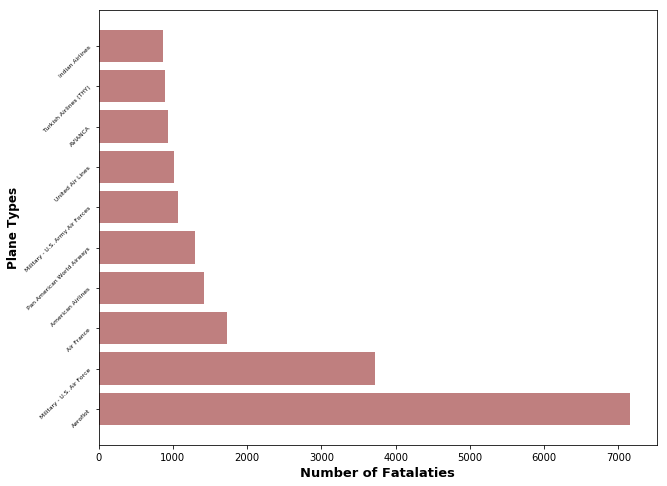

In [18]:
type_pd = oper_data.groupby("Operator").sum().reset_index()
type_pd = type_pd.sort_values('Fatalities',ascending=False)
#print(type_pd)
x_axis = np.arange(len(type_pd.head(10)))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,8))

#plt.bar(x_axis,df_crash_per_yr["Year"], color='r', alpha=0.5, align="edge")
plt.barh(x_axis,type_pd.Fatalities.head(10),color='maroon',align="edge", alpha=0.5)
plt.yticks(tick_locations, type_pd.Operator.head(10),fontsize=6,rotation=45)

#plt.title("Highest Crashes by Plane Type (1908-2007)",fontdict ={'fontweight':'bold','fontsize':16})
plt.ylabel('Plane Types', fontdict ={'fontweight':'bold','fontsize':12})
plt.xlabel('Number of Fatalaties',fontdict ={'fontweight':'bold','fontsize':13})
plt.savefig('output/operators_fatalities.png')
plt.show()